<a href="https://colab.research.google.com/github/Nadezda-Sut/EEG/blob/main/Segment_continuous_EEG_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convert .set EEG format to .fif format



In [1]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.6 MB/s eta 0:00:00


In [2]:
import matplotlib
import pathlib
import mne

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.set"

In [5]:
raw = mne.io.read_raw_eeglab(file_path)
raw = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

Reading /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fdt


<ipython-input-5-270adf855ea2>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-5-270adf855ea2>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


In [6]:
# Создание фиксированных эпох продолжительностью 2 секунды
events = mne.make_fixed_length_events(raw, id=1, start=0, duration=2)

# Создание эпох на основе фиксированных событий
epochs = mne.Epochs(raw, events, tmin=0, tmax=1, baseline=None, preload=True)

# Просмотр эпох
print(epochs)

Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Loading data for 120 events and 257 original time points ...
0 bad epochs dropped
<Epochs |  120 events (all good), 0 - 1 sec, baseline off, ~13.5 MB, data loaded,
 '1': 120>


In [12]:
input_file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.set'
output_file = '/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif'

# Read the EEG data from the input file
raw = mne.io.read_raw_eeglab(input_file, preload=True)

# Save the EEG data to the output file in FIF format
raw.save(output_file, overwrite=True)

Reading /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fdt
Reading 0 ... 61924  =      0.000 ...   241.891 secs...
Writing /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif


<ipython-input-12-664dc7b7bada>:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(input_file, preload=True)
<ipython-input-12-664dc7b7bada>:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(input_file, preload=True)
<ipython-input-12-664dc7b7bada>:8: RuntimeWarning: This filename (/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_file, overwrite=True)


Closing /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif
[done]


In [13]:
raw = mne.io.read_raw_fif(output_file)

Opening raw data file /content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif...
    Range : 0 ... 61924 =      0.000 ...   241.891 secs
Ready.


<ipython-input-13-93a0b834aa5d>:1: RuntimeWarning: This filename (/content/gdrive/My Drive/Colab Notebooks/VatEvgDoICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(output_file)


Using matplotlib as 2D backend.


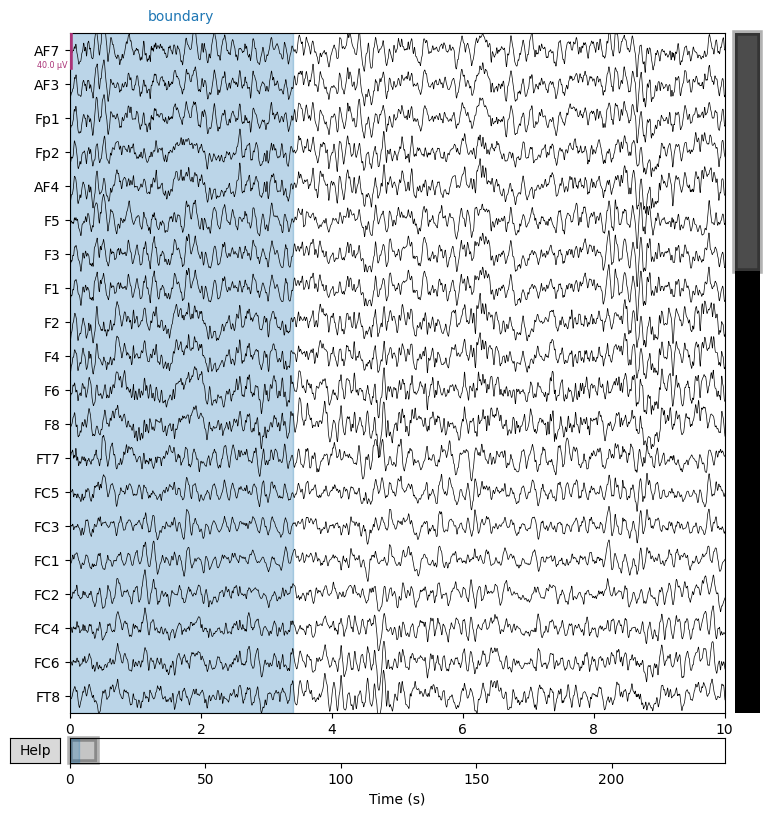

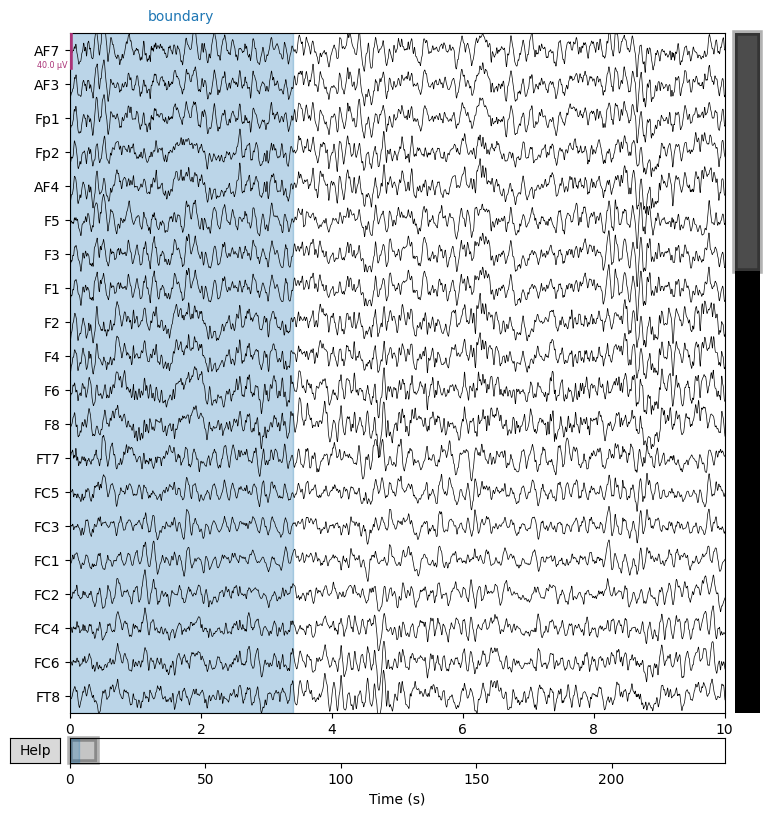

In [14]:
raw.plot()

In [25]:
events = mne.make_fixed_length_events(raw, id=1, start=0, duration=4)

# Создание эпох на основе фиксированных событий
epochs = mne.Epochs(raw, events)

# Просмотр эпох
print(epochs)

Not setting metadata
60 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
<Epochs |  60 events (good & bad), -0.199219 - 0.5 sec, baseline -0.199219 – 0 sec, ~84 kB, data not loaded,
 '1': 60>


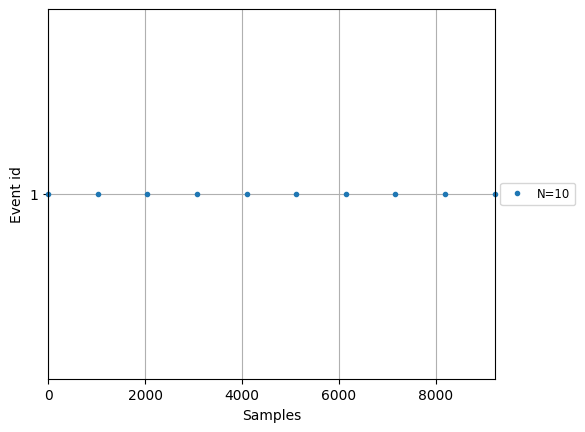

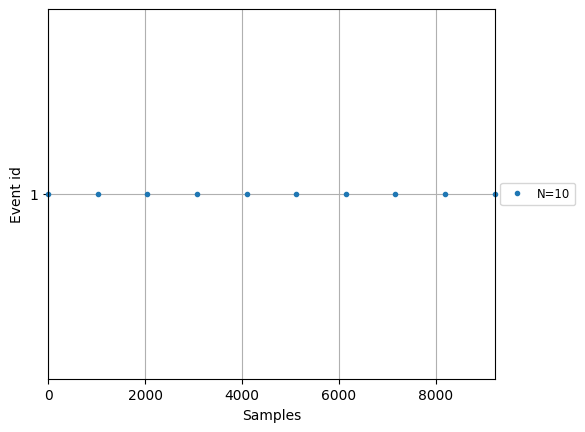

In [26]:
mne.viz.plot_events(events[:10])

Loading data for 60 events and 180 original time points ...
1 bad epochs dropped
Loading data for 20 events and 180 original time points ...


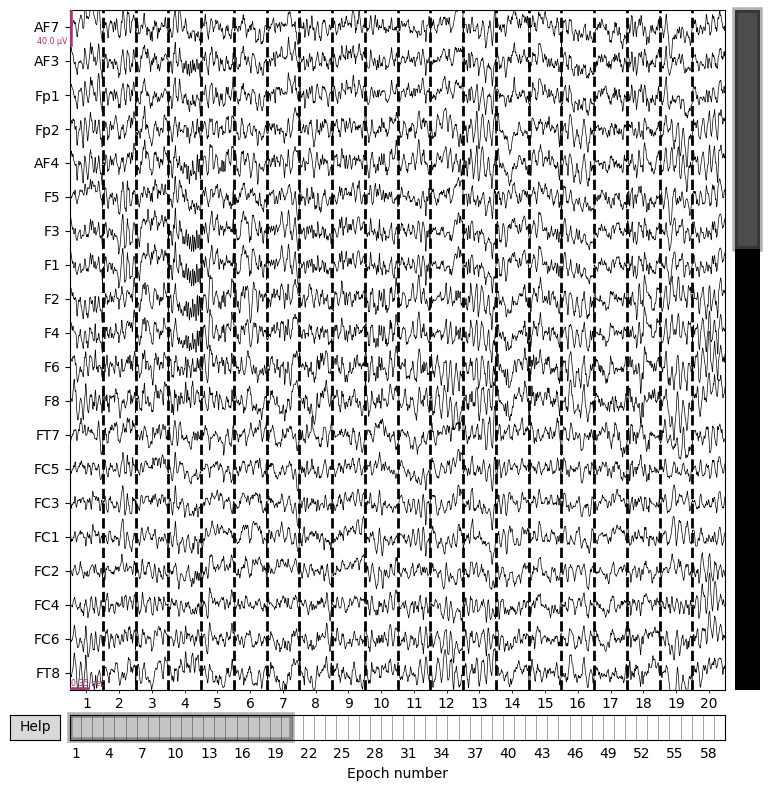

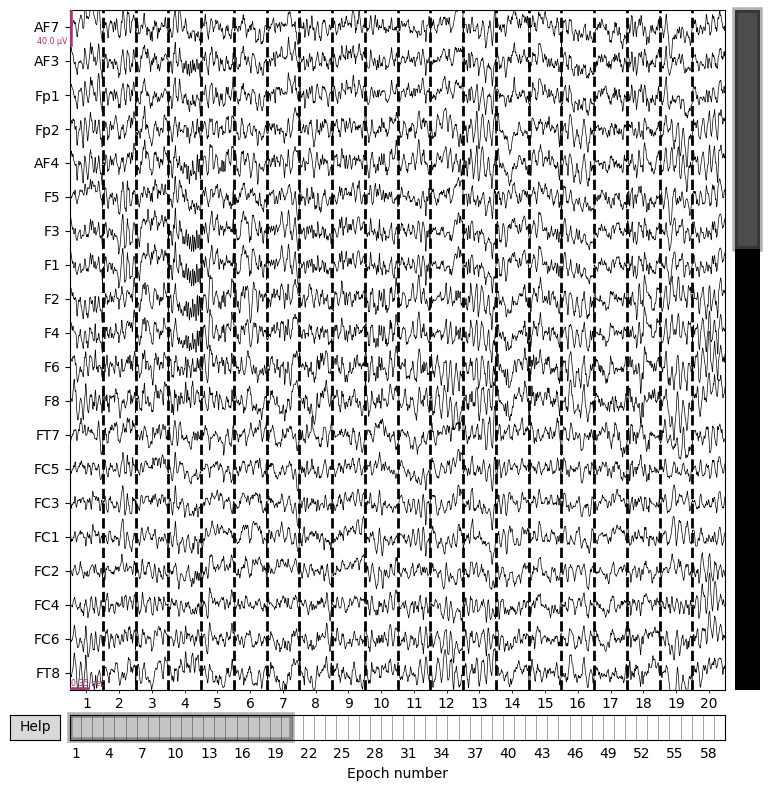

In [27]:
epochs.plot()

In [31]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,59
Events,1: 59
Time range,-0.199 – 0.500 sec
Baseline,-0.199 – 0.000 sec


In [32]:
epochs

Number of events,59
Events,1: 59
Time range,-0.199 – 0.500 sec
Baseline,-0.199 – 0.000 sec


In [33]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: AF7, AF3, Fp1, Fp2, AF4, F5, F3, F1, F2, F4, F6, F8, FT7, FC5, ...
 chs: 57 EEG
 custom_ref_applied: False
 dig: 60 items (3 Cardinal, 57 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 57
 projs: []
 sfreq: 256.0 Hz
>

Loading data for 59 events and 180 original time points ...
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


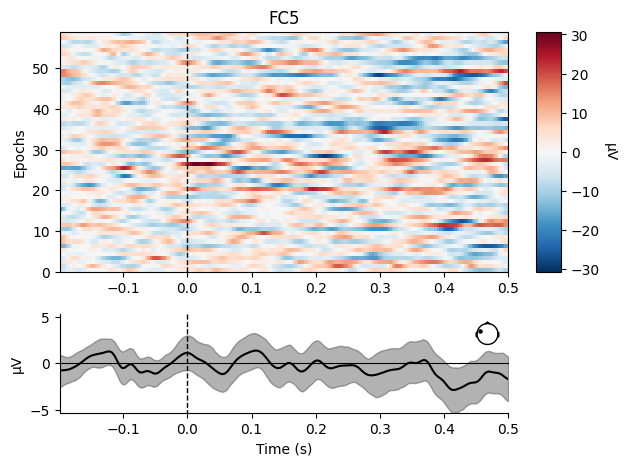

[<Figure size 640x480 with 4 Axes>]

In [34]:
epochs.plot_image(picks=[13])

In [36]:
epochs.save('_epo.fif')

Loading data for 1 events and 180 original time points ...
Loading data for 59 events and 180 original time points ...


In [39]:
output_file

In [40]:
output_file = '/content/gdrive/My Drive/Colab Notebooks/_epo.fif'


# Save the EEG data to the output file in FIF format
raw.save(output_file, overwrite=True)

Writing /content/gdrive/My Drive/Colab Notebooks/_epo.fif


<ipython-input-40-24db5f1b2f29>:5: RuntimeWarning: This filename (/content/gdrive/My Drive/Colab Notebooks/_epo.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_file, overwrite=True)


Closing /content/gdrive/My Drive/Colab Notebooks/_epo.fif
[done]
